In [1]:
# This is to rain and test the YOLOv6 algorithm on Hard Hat Workers dataset.
# Note: this notebook was run using "Python 3 (ipykernel)" on Azure ML.

# He Zhang, July, 2022

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 1.8.2+cu102
Torchvision: 0.9.2+cu102
GPU: 4 Tesla M60


In [3]:
# go to folder YOLOv6
%cd YOLOv6/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/YOLOv6


In [4]:
%%writefile ./data/hardhat7041yolov6.yaml

# train & val & test sets
train: ../datasets/hard_hat_workers_dataset/images/train  # train images (relative to 'path') 5269 images
val: ../datasets/hard_hat_workers_dataset/images/test  # val images (relative to 'path') 1766 images
test:  # test images (optional)

# whether it is coco dataset, only coco dataset should be set to True.
is_coco: False

# classe information
nc: 3 # number of classes
names: ["head", "helmet", "person"] # class names

Overwriting ./data/hardhat7041yolov6.yaml


In [6]:
# train
%run -i tools/train.py --batch 20 --img-size 672 --epochs 10 --name exp_hardhat --data data/hardhat7041yolov6.yaml --conf configs/yolov6s_finetune.py --eval-interval 10 --device 0

Using 1 GPU for training... 
training args are: Namespace(batch_size=20, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='data/hardhat7041yolov6.yaml', device='0', dist_url='env://', epochs=10, eval_final_only=False, eval_interval=10, gpu_count=0, heavy_eval_range=50, img_size=672, local_rank=-1, name='exp_hardhat', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp_hardhat', workers=8, world_size=1)

Train: Checking formats of images with 8 process(es): 
0 image(s) corrupted: 100%|██████████| 5269/5269 [01:07<00:00, 77.56it/s]
Train: Checking formats of labels with 8 process(es): 
5269 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100%|██████████| 5269/5269 [00:37<00:00, 140.04it/s]
Train: Final numbers of valid images: 5269/ labels: 5269. 
107.0s for dataset initialization.
Val: Checking formats of images with 8 process(es): 
0 image(s) corrupted: 100%|██████████| 1766/1766 [00:37<00:00,


Training start...

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       0/9     1.437    0.8322     2.517     1.098: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:47<00:00,  1.06s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=6.50s).
Accumulating evaluation results...


Epoch: 0 | mAP@0.5: 0.6245347695998011 | mAP@0.50:0.95: 0.37474471842677165


DONE (t=1.48s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.416
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.321
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.422
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.647
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.644
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.721



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       1/9     1.287    0.5967     1.221    0.7463: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:46<00:00,  1.03s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.99s).
Accumulating evaluation results...


Epoch: 1 | mAP@0.5: 0.6424947872849259 | mAP@0.50:0.95: 0.38011172951503763


DONE (t=1.42s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.380
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.642
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.328
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.434
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.459
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.192
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.657
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.655
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.746



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       2/9     1.287    0.5778     1.143    0.6989: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:48<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.87s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=7.06s).
Accumulating evaluation results...


Epoch: 2 | mAP@0.5: 0.6457365554940735 | mAP@0.50:0.95: 0.3745858396457203


DONE (t=1.54s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.392
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.312
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.425
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.486
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.649
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.752



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       3/9     1.192    0.5354     1.048    0.6266: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:46<00:00,  1.03s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.66s).
Accumulating evaluation results...


Epoch: 3 | mAP@0.5: 0.6488219429230966 | mAP@0.50:0.95: 0.4069778788378772


DONE (t=1.38s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.649
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.469
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.354
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.472
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.190
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.750



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       4/9     1.143    0.5094     1.009    0.5954: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:43<00:00,  1.03it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.69s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.82s).
Accumulating evaluation results...


Epoch: 4 | mAP@0.5: 0.6534939585959569 | mAP@0.50:0.95: 0.42039842822758167


DONE (t=1.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.420
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.494
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.459
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.201
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.655
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.634
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.676
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.747



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       5/9     1.113    0.4971    0.9675     0.582: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:42<00:00,  1.05it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.60s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.46s).
Accumulating evaluation results...


Epoch: 5 | mAP@0.5: 0.658356048203145 | mAP@0.50:0.95: 0.4301423355028223


DONE (t=1.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.430
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.658
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.508
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.466
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.204
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.678
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.635
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.743



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       6/9     1.071    0.4751    0.9082    0.5603: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:43<00:00,  1.03it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.58s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.62s).
Accumulating evaluation results...


Epoch: 6 | mAP@0.5: 0.6589439358901195 | mAP@0.50:0.95: 0.4345881753942715


DONE (t=0.97s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.435
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.659
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.486
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.759



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       7/9     1.056    0.4659    0.8845      0.55: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:43<00:00,  1.03it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.58s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.76s).
Accumulating evaluation results...


Epoch: 7 | mAP@0.5: 0.6588236404440999 | mAP@0.50:0.95: 0.4375865946314534


DONE (t=1.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.659
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.391
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.492
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.692
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.701
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.774



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       8/9     1.048    0.4635    0.8738    0.5465: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:44<00:00,  1.00it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.21s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.14s).
Accumulating evaluation results...


Epoch: 8 | mAP@0.5: 0.6574898265977269 | mAP@0.50:0.95: 0.43435868153747387


DONE (t=1.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.434
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.657
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.495
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.641
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.763



     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
       9/9     1.047    0.4577    0.8569    0.5459: 100%|██████████| 264/264 [04
Inferencing model in val datasets.: 100%|███████| 45/45 [00:43<00:00,  1.04it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_hardhat/predictions.json...


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.57s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.48s).
Accumulating evaluation results...


Epoch: 9 | mAP@0.5: 0.6602215182235184 | mAP@0.50:0.95: 0.4437465786606319


DONE (t=0.95s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.660
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.525
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.467
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.482
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.511
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.702
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.711
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.781



Training completed in 0.951 hours.


In [7]:
# evaluate
%run -i tools/eval.py --data data/hardhat7041yolov6.yaml --weights runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt --name exp_hardhat --device 0

Namespace(batch_size=32, conf_thres=0.001, data='data/hardhat7041yolov6.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='exp_hardhat', save_dir='runs/val/', task='val', weights='runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 44.08
Val: Checking formats of labels with 8 process(es): 
1766 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100%|██████████| 1766/1766 [00:12<00:00, 139.08it/s]
Convert to COCO format
100%|██████████| 1766/1766 [00:00<00:00, 53639.56it/s]
Convert to COCO format finished. Resutls saved in ../datasets/hard_hat_workers_dataset/annotations/instances_test.json
Val: Final numbers of valid images: 1766/ labels: 1766. 
14.0s for dataset initialization.
Inferencing model in val datasets.: 100%|███████| 56/56 [00:32<00:00,  1.72it/s]

Evaluatin

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.18s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.57s).
Accumulating evaluation results...


Results saved to runs/val/exp_hardhat


DONE (t=0.62s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.661
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.392
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.517
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.719


In [8]:
# infer
%run -i tools/infer.py --yaml data/hardhat7041yolov6.yaml --weights runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt --source ../datasets/test_images/hardhat/ --name exp_hardhat --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp_hardhat', project='runs/inference', save_img=True, save_txt=False, source='../datasets/test_images/hardhat/', weights='runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt', yaml='data/hardhat7041yolov6.yaml')
Loading checkpoint from runs/train/exp_hardhat_img544_epo100/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
Results saved to runs/inference/exp_hardhat


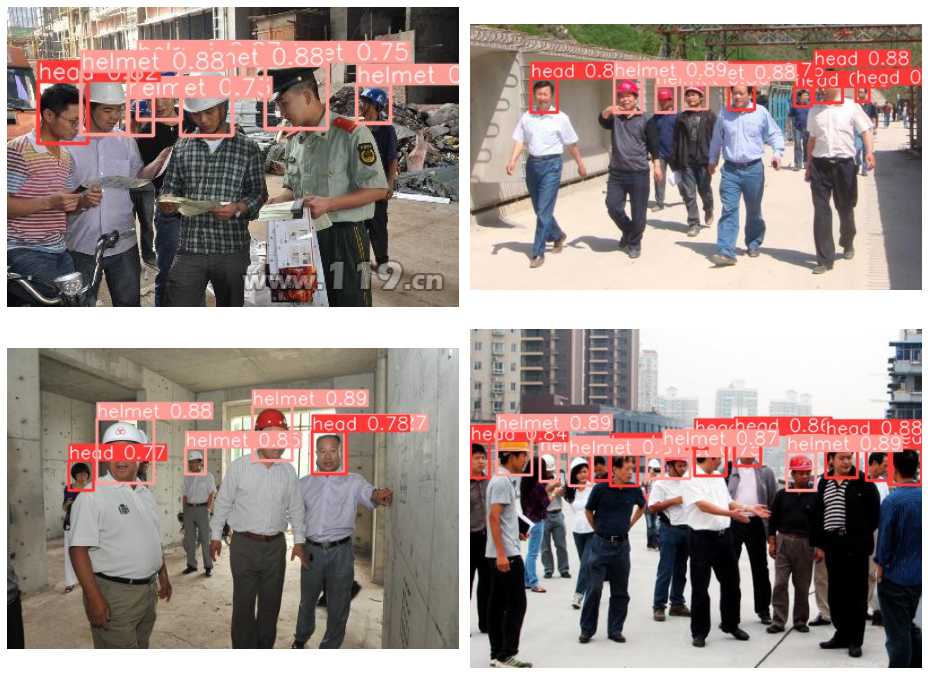

In [10]:
# visualize detection results
bbox_img1 = plt.imread("runs/inference/exp_hardhat/005382_jpg.rf.bad5f80a3fa19ab150532b976adaa2f1.jpg")
bbox_img2 = plt.imread("runs/inference/exp_hardhat/005398_jpg.rf.e985245df68dd22ebdb6312ab2dc9fc2.jpg")
bbox_img3 = plt.imread("runs/inference/exp_hardhat/005407_jpg.rf.c04655757eebeae99b5dc10d9f57972a.jpg")
bbox_img4 = plt.imread("runs/inference/exp_hardhat/005457_jpg.rf.44b81185f7ddc9286805c567057cf9a5.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()